# Homework Week 4 ML-Zoomcamp
Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

## **Dataset**  
In this homework, we will use Credit Card Data from book "Econometric Analysis".

Here's a wget-able link:

```python
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
```

The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).



In [8]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv -O data/AER_credit_card_data.csv

--2022-10-05 20:03:06--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘data/AER_credit_card_data.csv’

data/AER_credit_car 100%[===================>]  71,53K  --.-KB/s    in 0,02s   

2022-10-05 20:03:06 (3,42 MB/s) - ‘data/AER_credit_card_data.csv’ saved [73250/73250]



## **Preparation**  
Create the target variable by mapping yes to 1 and no to 0.


In [17]:
df = pd.read_csv('data/AER_credit_card_data.csv')
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [18]:
df.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [16]:
card_values = {
    1: 'yes',
    0: 'no'
}

df.card = df.card.map(card_values)

In [20]:
card_values = {
    'yes': 1,
    'no': 0
}

df.card = df.card.map(card_values)

In [21]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [22]:
df.isna().sum() ## There is no NaN values

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   int64  
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 123.8+ KB


In [26]:
# Color Palettes
colors = ["#bfd3e6", "#9b5b4f", "#4e4151", "#dbba78", "#bb9c55", "#909195","#dc1e1e","#a02933","#716807","#717cb4"]
df.describe().T.style.bar(subset=['mean'],color=colors[3]).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
card,1319.000000,0.775588,0.417353,0.000000,1.000000,1.000000,1.000000,1.000000
reports,1319.000000,0.456406,1.345267,0.000000,0.000000,0.000000,0.000000,14.000000
age,1319.000000,33.213103,10.142783,0.166667,25.416670,31.250000,39.416670,83.500000
income,1319.000000,3.365376,1.693902,0.210000,2.243750,2.900000,4.000000,13.500000
share,1319.000000,0.068732,0.094656,0.000109,0.002316,0.038827,0.093617,0.906320
expenditure,1319.000000,185.057071,272.218917,0.000000,4.583333,101.298300,249.035800,3099.505000
dependents,1319.000000,0.993935,1.247745,0.000000,0.000000,1.000000,2.000000,6.000000
months,1319.000000,55.267627,66.271746,0.000000,12.000000,30.000000,72.000000,540.000000
majorcards,1319.000000,0.817286,0.386579,0.000000,1.000000,1.000000,1.000000,1.000000
active,1319.000000,6.996967,6.305812,0.000000,2.000000,6.000000,11.000000,46.000000


What are the categorical and numerical variables.

In [36]:
numerical = df.dtypes[df.dtypes != "object"].index.to_list()
numerical

['card',
 'reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

In [37]:
categorical = df.dtypes[df.dtypes == "object"].index.to_list()
categorical

['owner', 'selfemp']

In [75]:
# verifying values on categorical variables
print(df_train[categorical]['owner'].unique())
print(df_train[categorical]['selfemp'].unique())

['no' 'yes']
['no' 'yes']


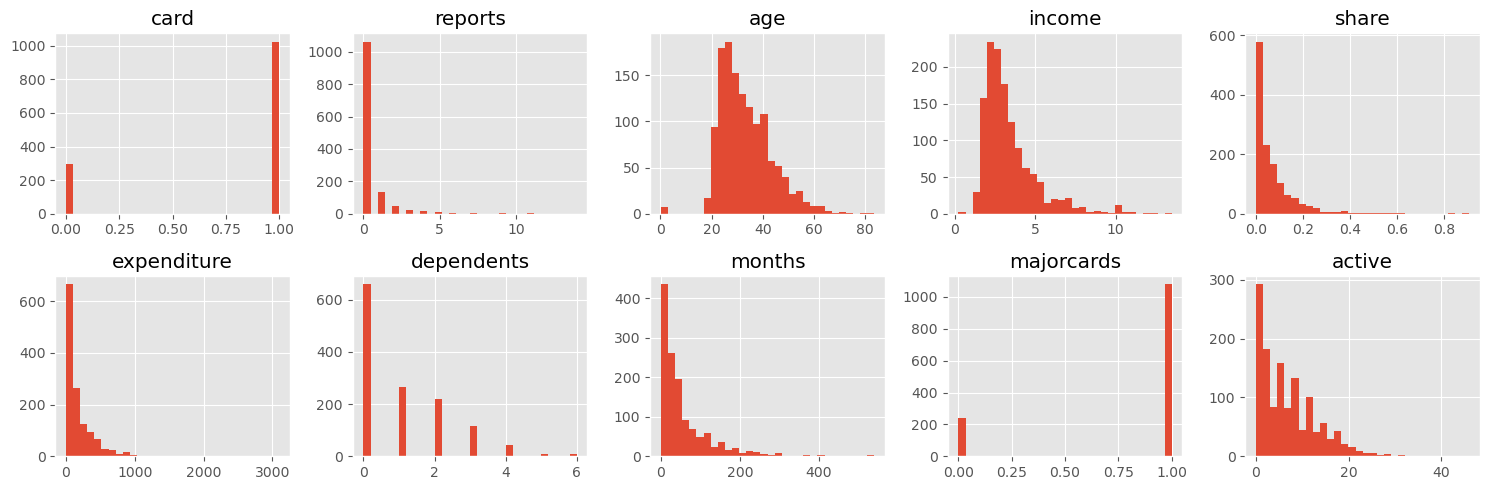

In [38]:
#@ INSPECTING HISTOGRAM:
fig = plt.figure(figsize=(15,5))
ax = plt.gca()
df.hist(bins=30, ax=ax, layout=(2, 5), column=numerical)
plt.tight_layout()
plt.show()

Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1.

In [48]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [49]:
len(df_train), len(df_val), len(df_test)

(791, 264, 264)

In [50]:
round(len(df_train)/len(df)*100,0), round(len(df_val)/len(df)*100,0), round(len(df_test)/len(df)*100,0)

(60.0, 20.0, 20.0)

In [51]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [52]:
y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

In [104]:
(y_train == 0).sum(), (y_train == 1).sum()

(177, 614)

In [105]:
(y_val == 0).sum(), (y_val == 1).sum()

(53, 211)

In [106]:
(y_test == 0).sum(), (y_test == 1).sum()

(66, 198)

In [53]:
del df_train['card']
del df_val['card']
del df_test['card']

In [54]:
df_train.columns

Index(['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [58]:
# Updating the numerical variables list by removing target variable.
numerical.remove('card')
numerical

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

### Question 1
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score and compute AUC with the card variable.
- Use the training dataset for that.
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenditure'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [83]:
numerical

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

In [110]:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print(c, auc)

reports 0.7166629860689376
age 0.5240020979407055
income 0.5908049467233478
share 0.989183643423692
expenditure 0.991042345276873
dependents 0.5327757227773791
months 0.5294217780967629
majorcards 0.5343859842838476
active 0.6043173411362006


Which numerical variable (among the following 4) has the highest AUC?

- reports
- dependents
- active
- **share**

R/ The answer among the 4 available is share, given it has 0.989 AUC, is incredible how good descriptors are expenditure and share, might be that those 2 variables are leakage of the target variable. Need to explore in detail considerations about the dataset.

#### Training the model
From now on, use these columns only:

```python
["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
```
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [111]:
features = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

In [114]:
train_dict = df_train[features].to_dict(orient='records')
train_dict

[{'reports': 3,
  'age': 40.5,
  'income': 4.0128,
  'share': 0.0002990431,
  'expenditure': 0.0,
  'dependents': 1,
  'months': 12,
  'majorcards': 1,
  'active': 17,
  'owner': 'no',
  'selfemp': 'no'},
 {'reports': 1,
  'age': 32.33333,
  'income': 6.0,
  'share': 0.0002,
  'expenditure': 0.0,
  'dependents': 4,
  'months': 18,
  'majorcards': 1,
  'active': 4,
  'owner': 'yes',
  'selfemp': 'no'}]

In [115]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [116]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [118]:
val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

In [119]:
roc_auc_score(y_val, y_pred)

0.995171242063847

### Question 2
What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.615
- 0.515
- 0.715
- **0.995**

R/ The answer is 0.995, no doubt there is data leakage from features like expenditures and share, how can I have data about anual expenditures about my credit card before it is given to me?, do they have data from other card providers before or was this data collected after given the card and this is the reason the high AUC reported?

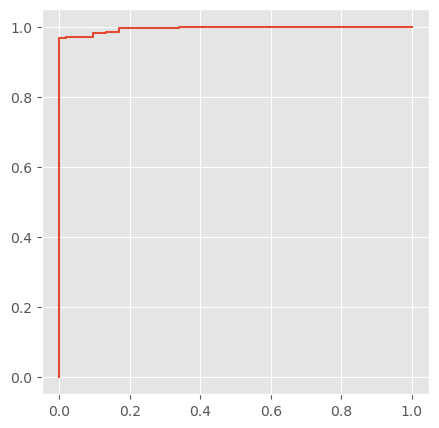

In [121]:
plt.figure(figsize=(5,5))

fpr, tpr, _ = roc_curve(y_val, y_pred)
plt.plot(fpr, tpr)

Almost the ideal model, **suspicious** because this doesn't happen in real life

### Question 3
Now let's compute precision and recall for our model.

- Evaluate the model on the validation dataset on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

In [134]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []
    
    thresholds = np.linspace(0, 1, 101)
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        
        scores.append((t, tp, fp, fn, tn))
        
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores    

In [135]:
df_scores = confusion_matrix_dataframe(y_val, y_pred)

In [136]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [137]:
df_scores[::10]

,threshold,tp,fp,fn,tn,p,r
0,0.0,211,53,0,0,0.799242,1.000000
10,0.1,210,17,1,36,0.925110,0.995261
20,0.2,207,5,4,48,0.976415,0.981043
30,0.3,205,5,6,48,0.976190,0.971564
40,0.4,205,1,6,52,0.995146,0.971564
50,0.5,204,1,7,52,0.995122,0.966825
60,0.6,204,1,7,52,0.995122,0.966825
70,0.7,204,1,7,52,0.995122,0.966825
80,0.8,204,1,7,52,0.995122,0.966825
90,0.9,204,0,7,53,1.000000,0.966825


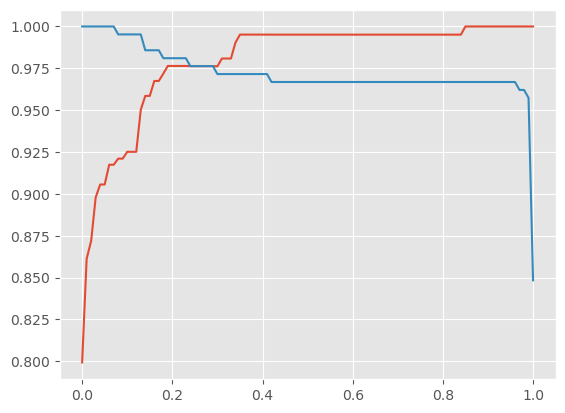

In [138]:
plt.plot(df_scores.threshold, df_scores.p)
plt.plot(df_scores.threshold, df_scores.r)

At which threshold precision and recall curves intersect?

* 0.1
* **0.3**
* 0.6
* 0.8

R/ The precision and recall intersect at a threshold around 0.3 or a little bit less.

### Question 4
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing :

 

Where  is precision and  is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01 using the validation set

In [139]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)
df_scores[::10]

,threshold,tp,fp,fn,tn,p,r,f1
0,0.0,211,53,0,0,0.799242,1.000000,0.888421
10,0.1,210,17,1,36,0.925110,0.995261,0.958904
20,0.2,207,5,4,48,0.976415,0.981043,0.978723
30,0.3,205,5,6,48,0.976190,0.971564,0.973872
40,0.4,205,1,6,52,0.995146,0.971564,0.983213
50,0.5,204,1,7,52,0.995122,0.966825,0.980769
60,0.6,204,1,7,52,0.995122,0.966825,0.980769
70,0.7,204,1,7,52,0.995122,0.966825,0.980769
80,0.8,204,1,7,52,0.995122,0.966825,0.980769
90,0.9,204,0,7,53,1.000000,0.966825,0.983133


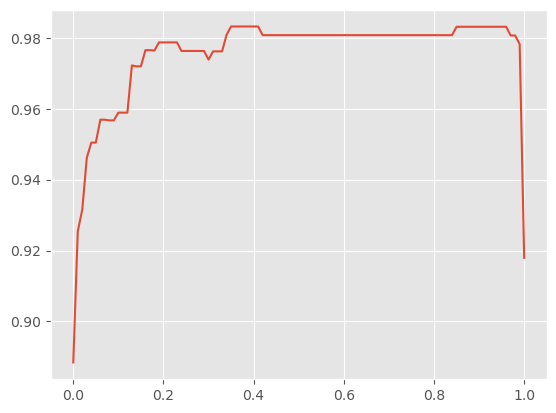

In [140]:
plt.plot(df_scores.threshold, df_scores.f1)

In [141]:
df_scores.set_index('threshold').f1.argmax()

35

At which threshold F1 is maximal?

* 0.1
* **0.4**
* 0.6
* 0.7

R/ The maximum F1 is given at 0.35 threshold, from those in the answer we select 0.4

### Question 5
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation



In [143]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[features].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

def predict(df, dv, model):
    dicts = df[features].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [145]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [147]:
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.card.values
    y_val = df_val.card.values
    
    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.996 +- 0.003


How large is standard devidation of the AUC scores across different folds?

* **0.003**
* 0.014
* 0.09
* 0.24

R/ The standard deviation of the AUC scores across the 5 folds is 0.003

In [148]:
scores

[0.9941860465116279,
 0.9941176470588236,
 0.9943346508563901,
 0.9996107939802803,
 1.0]

### Question 6
Now let's use 5-Fold cross-validation to find the best parameter C

- Iterate over the following C values: [0.01, 0.1, 1, 10]
- Initialize KFold with the same parameters as previously
- Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [152]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('%s: %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

0.01: 0.996 +- 0.003
0.1: 0.996 +- 0.003
1: 0.996 +- 0.003
10: 0.996 +- 0.003


Which C leads to the best mean score?

* **0.01**
* 0.1
* 1
* 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

R/ all have the same auc, so choosing the smallest C I select 0.01

